In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.8.0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
url = "https://github.com/FazlullahBokhari/Datasets/blob/main/Churn_Modelling.csv?raw=true"

In [5]:
dataset = pd.read_csv(url)

In [6]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# Divide the dataset into independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [8]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
# feature engineering 
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [11]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [12]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [13]:
X = X.drop(['Geography','Gender'],axis=1)

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [15]:
X = pd.concat([X,geography,gender], axis=1)

In [16]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [17]:
# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [18]:
# feature Scaling 

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [21]:
# Now lets create the ANN 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU 
from tensorflow.keras.layers import Dropout

In [22]:
# lets initialize the ANN 
classifier = Sequential()

In [23]:
# adding the input layer and first hidden layer
classifier.add(Dense(10, input_shape=(11,), activation='relu'))

In [24]:
classifier

In [25]:
# adding the first hidden layer 
classifier.add(Dense(units=10, activation='relu'))
#classifier.add(Dropout(0.2))

In [26]:
# adding the second hidden layer 
classifier.add(Dense(units=10, activation='relu'))
#classifier.add(Dropout(0.3))

In [27]:
# adding output layer
classifier.add(Dense(1, activation='sigmoid'))

In [28]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [29]:
import tensorflow 
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [30]:
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
# Early stopping
import tensorflow as tf 
early_stopping = tf.keras.callbacks.EarlyStopping(

    monitor = 'val_loss',
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False,
)

In [32]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 2ms/step - loss: 0.4413 - accuracy: 0.8056 - val_loss: 0.4082 - val_accuracy: 0.8243
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3729 - accuracy: 0.8507 - val_loss: 0.3745 - val_accuracy: 0.8466
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3602 - accuracy: 0.8552 - val_loss: 0.3652 - val_accuracy: 0.8463
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3496 - accuracy: 0.8572 - val_loss: 0.3724 - val_accuracy: 0.8470
Epoch 5/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3469 - accuracy: 0.8591 - val_loss: 0.3734 - val_accuracy: 0.8425
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8647 - val_loss: 0.3647 - val_accuracy: 0.8470
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.8604 - val_loss: 0.3723 - val_accuracy:

In [33]:
model_history = classifier.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
800/800 [==============================] - 3s 3ms/step - loss: 0.3330 - accuracy: 0.8649 - val_loss: 0.3398 - val_accuracy: 0.8580
Epoch 2/1000
800/800 [==============================] - 2s 3ms/step - loss: 0.3315 - accuracy: 0.8650 - val_loss: 0.3427 - val_accuracy: 0.8555
Epoch 3/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.3308 - accuracy: 0.8677 - val_loss: 0.3339 - val_accuracy: 0.8590
Epoch 4/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.3321 - accuracy: 0.8648 - val_loss: 0.3515 - val_accuracy: 0.8560
Epoch 5/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.3291 - accuracy: 0.8650 - val_loss: 0.3506 - val_accuracy: 0.8565
Epoch 6/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.3287 - accuracy: 0.8671 - val_loss: 0.3390 - val_accuracy: 0.8570
Epoch 7/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.3310 - accuracy: 0.8668 - val_loss: 0.3373 - val_accuracy:

In [34]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

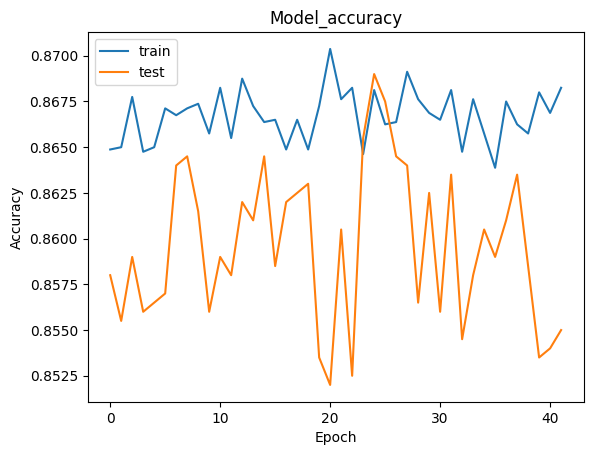

In [36]:
# summarize history for accuracy 
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [37]:
# Making the predictions and evaluating the model 

#predicting the test set results 
y_pred = classifier.predict(X_test)
y_pred = (y_pred>= 0.5)

In [38]:
#Make the confusion matrix 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
cm

array([[1496,   99],
       [ 191,  214]], dtype=int64)

In [39]:
# calculate the accuracy 
from sklearn.metrics import accuracy_score
score = accuracy_score(y_true=y_test, y_pred=y_pred)

In [40]:
score

0.855

In [41]:
# get the weights 
classifier.get_weights()

[array([[ 9.49990302e-02,  7.01634645e-01,  1.77322304e+00,
          1.12178195e+00, -1.07948594e-01,  6.45235181e-01,
         -1.49887532e-01,  5.05424082e-01,  2.51350582e-01,
         -1.46453992e-01],
        [-4.26741791e+00, -4.28093582e-01, -7.11107910e-01,
         -3.49522829e+00, -1.90979683e+00, -3.46763062e+00,
         -2.38703346e+00, -6.34372187e+00,  3.12291741e+00,
          8.22813332e-01],
        [-8.03728998e-02,  4.80966330e-01,  1.25214541e+00,
          1.20230711e+00, -3.64001870e-01,  3.02711248e-01,
          4.01711047e-01,  8.74780238e-01,  4.88453686e-01,
         -2.29104578e-01],
        [-1.11639571e+00, -4.76788998e+00, -1.12101841e+00,
          3.99657667e-01,  5.43201447e+00, -3.04545283e+00,
         -2.61112499e+00, -6.26851618e-01, -1.29180932e+00,
          1.06003928e+00],
        [ 1.94069386e+00, -4.86445570e+00,  2.31148148e+00,
         -2.96014214e+00,  1.27328980e+00, -1.06244898e+00,
          1.61445189e+00, -7.64464214e-02,  6.807665